<a href="https://colab.research.google.com/github/Chen-Wi-Ki/IMU_Question_Analyze/blob/main/IMU_QA_Test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 驗證某廠牌IMU飄移落差之QA問題(改進版)



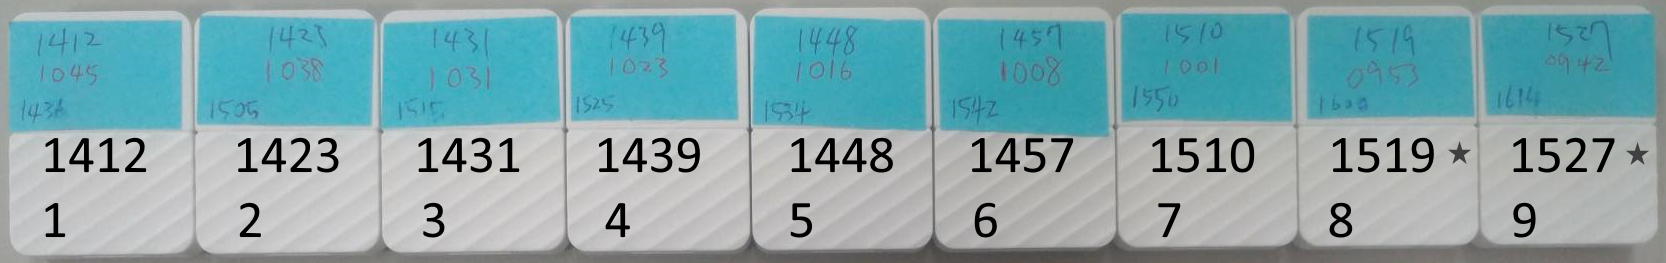

# QA分析說明

※因多人反應有兩顆飄移(有打星號的)問題特別嚴重而做的量化測驗，另廠商額外提供了四顆供我們替換掉有問題的感測器。

※打星號的問題發生在定位於手臂上,然後產生左右手開始不同飄移程度之現象而被感覺到異樣，因1519為上臂；1527為下臂，初估1519可能存在飄移相對嚴重之問題。

※本試驗用於單一系統QA問題,用意在挑選飄移量最相近的5顆感測器，而非選最優，可能會採取挑出最優與最差的4顆感測器作為結論；或者挑出飄移量最少(即最優)的感測器作為永遠是「胸」前的那顆核心感測器，其餘4顆挑選飄移量最相近的4顆作為結論。

※上圖編號依時間編序:編號藍色是7/15下午測的;紅色是7/22下午測的;黃色是7/25下午測的，下列程序編號依7/15為準，或者依左而右排序1~9號的感測器為準(主要是因程序撰寫方便)。

※實驗方法:每顆皆設定成單獨的胸前感測，使用了對重力校正，每顆IMU執行約1分鐘重複3軸90度來回旋轉後，觀測約5輪(5分鐘)左右每顆感測器訊號圖形的吻合程度，作為飄移差距的觀測分析。

[總資料](https://drive.google.com/drive/folders/1RSFT9zOqfvUxiA_ThBt5nU05OylbgLrk?usp=sharing)

[感測資料](https://drive.google.com/drive/folders/1RQTmQ2jxgVmRrjH8B5gvmjgArUbAVDMf?usp=sharing)

[機械手臂重複測試影片](https://drive.google.com/file/d/1rrSmna_G9fRjSEg_ffr4aNuhCNElSDb6/view?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive' , force_remount=True)

Mounted at /content/gdrive


In [ ]:
#BoosterMain資料夾與Data位置
!ls gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析

ArmTestVideo.mp4  Data	IMU_QA_Test2.ipynb


In [ ]:
#Data目錄一覽
!ls gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data

Data--20220715	Data--20220722	Data--20220726


# 第一次QA

In [ ]:
#Data一覽
!ls gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/

'20220715(1436).csv'  '20220715(1534).csv'  '20220715(1608error).csv'
'20220715(1505).csv'  '20220715(1542).csv'  '20220715(1614).csv'
'20220715(1515).csv'  '20220715(1550).csv'
'20220715(1525).csv'  '20220715(1600).csv'


In [ ]:
#動態訊號分析7/15
import pandas as pd
usecols = ['Yaw', 'Pitch', 'Roll']
skiprows = 2

#1
data1412 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1436).csv',skiprows=skiprows,usecols=usecols)
init_data1412 = data1412[0:1]
init_data1412['Yaw'] =init_data1412['Yaw'].astype(float)
init_data1412['Pitch'] =init_data1412['Pitch'].astype(float)
init_data1412['Roll'] =init_data1412['Roll'].astype(float)

calibration_data1412 = data1412[2:3]
calibration_data1412['Yaw'] =calibration_data1412['Yaw'].astype(float)
calibration_data1412['Pitch'] =calibration_data1412['Pitch'].astype(float)
calibration_data1412['Roll'] =calibration_data1412['Roll'].astype(float)

dynamic_data1412 = data1412[4:]
dynamic_data1412['Yaw'] =dynamic_data1412['Yaw'].astype(float)
dynamic_data1412['Pitch'] =dynamic_data1412['Pitch'].astype(float)
dynamic_data1412['Roll'] =dynamic_data1412['Roll'].astype(float)

#2
data1423 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1505).csv',skiprows=skiprows,usecols=usecols)
init_data1423 = data1423[0:1]
init_data1423['Yaw'] =init_data1423['Yaw'].astype(float)
init_data1423['Pitch'] =init_data1423['Pitch'].astype(float)
init_data1423['Roll'] =init_data1423['Roll'].astype(float)

calibration_data1423 = data1423[2:3]
calibration_data1423['Yaw'] =calibration_data1423['Yaw'].astype(float)
calibration_data1423['Pitch'] =calibration_data1423['Pitch'].astype(float)
calibration_data1423['Roll'] =calibration_data1423['Roll'].astype(float)

dynamic_data1423 = data1423[4:]
dynamic_data1423['Yaw'] =dynamic_data1423['Yaw'].astype(float)
dynamic_data1423['Pitch'] =dynamic_data1423['Pitch'].astype(float)
dynamic_data1423['Roll'] =dynamic_data1423['Roll'].astype(float)

#3
data1431 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1515).csv',skiprows=skiprows,usecols=usecols)
init_data1431 = data1431[0:1]
init_data1431['Yaw'] =init_data1431['Yaw'].astype(float)
init_data1431['Pitch'] =init_data1431['Pitch'].astype(float)
init_data1431['Roll'] =init_data1431['Roll'].astype(float)

calibration_data1431 = data1431[2:3]
calibration_data1431['Yaw'] =calibration_data1431['Yaw'].astype(float)
calibration_data1431['Pitch'] =calibration_data1431['Pitch'].astype(float)
calibration_data1431['Roll'] =calibration_data1431['Roll'].astype(float)

dynamic_data1431 = data1431[4:]
dynamic_data1431['Yaw'] =dynamic_data1431['Yaw'].astype(float)
dynamic_data1431['Pitch'] =dynamic_data1431['Pitch'].astype(float)
dynamic_data1431['Roll'] =dynamic_data1431['Roll'].astype(float)

#4
data1439 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1525).csv',skiprows=skiprows,usecols=usecols)
init_data1439 = data1439[0:1]
init_data1439['Yaw'] =init_data1439['Yaw'].astype(float)
init_data1439['Pitch'] =init_data1439['Pitch'].astype(float)
init_data1439['Roll'] =init_data1439['Roll'].astype(float)

calibration_data1439 = data1439[2:3]
calibration_data1439['Yaw'] =calibration_data1439['Yaw'].astype(float)
calibration_data1439['Pitch'] =calibration_data1439['Pitch'].astype(float)
calibration_data1439['Roll'] =calibration_data1439['Roll'].astype(float)

dynamic_data1439 = data1439[4:]
dynamic_data1439['Yaw'] =dynamic_data1439['Yaw'].astype(float)
dynamic_data1439['Pitch'] =dynamic_data1439['Pitch'].astype(float)
dynamic_data1439['Roll'] =dynamic_data1439['Roll'].astype(float)

#5
data1448 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1542).csv',skiprows=skiprows,usecols=usecols)
init_data1448 = data1448[0:1]
init_data1448['Yaw'] =init_data1448['Yaw'].astype(float)
init_data1448['Pitch'] =init_data1448['Pitch'].astype(float)
init_data1448['Roll'] =init_data1448['Roll'].astype(float)

calibration_data1448 = data1448[2:3]
calibration_data1448['Yaw'] =calibration_data1448['Yaw'].astype(float)
calibration_data1448['Pitch'] =calibration_data1448['Pitch'].astype(float)
calibration_data1448['Roll'] =calibration_data1448['Roll'].astype(float)

dynamic_data1448 = data1448[4:]
dynamic_data1448['Yaw'] =dynamic_data1448['Yaw'].astype(float)
dynamic_data1448['Pitch'] =dynamic_data1448['Pitch'].astype(float)
dynamic_data1448['Roll'] =dynamic_data1448['Roll'].astype(float)

#6
data1457 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1534).csv',skiprows=skiprows,usecols=usecols)
init_data1457 = data1457[0:1]
init_data1457['Yaw'] =init_data1457['Yaw'].astype(float)
init_data1457['Pitch'] =init_data1457['Pitch'].astype(float)
init_data1457['Roll'] =init_data1457['Roll'].astype(float)

calibration_data1457 = data1457[2:3]
calibration_data1457['Yaw'] =calibration_data1457['Yaw'].astype(float)
calibration_data1457['Pitch'] =calibration_data1457['Pitch'].astype(float)
calibration_data1457['Roll'] =calibration_data1457['Roll'].astype(float)

dynamic_data1457 = data1457[4:]
dynamic_data1457['Yaw'] =dynamic_data1457['Yaw'].astype(float)
dynamic_data1457['Pitch'] =dynamic_data1457['Pitch'].astype(float)
dynamic_data1457['Roll'] =dynamic_data1457['Roll'].astype(float)

#7
data1510 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1550).csv',skiprows=skiprows,usecols=usecols)
init_data1510 = data1510[0:1]
init_data1510['Yaw'] =init_data1510['Yaw'].astype(float)
init_data1510['Pitch'] =init_data1510['Pitch'].astype(float)
init_data1510['Roll'] =init_data1510['Roll'].astype(float)

calibration_data1510 = data1510[2:3]
calibration_data1510['Yaw'] =calibration_data1510['Yaw'].astype(float)
calibration_data1510['Pitch'] =calibration_data1510['Pitch'].astype(float)
calibration_data1510['Roll'] =calibration_data1510['Roll'].astype(float)

dynamic_data1510 = data1510[4:]
dynamic_data1510['Yaw'] =dynamic_data1510['Yaw'].astype(float)
dynamic_data1510['Pitch'] =dynamic_data1510['Pitch'].astype(float)
dynamic_data1510['Roll'] =dynamic_data1510['Roll'].astype(float)

#8
data1519 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1600).csv',skiprows=skiprows,usecols=usecols)
init_data1519 = data1519[0:1]
init_data1519['Yaw'] =init_data1519['Yaw'].astype(float)
init_data1519['Pitch'] =init_data1519['Pitch'].astype(float)
init_data1519['Roll'] =init_data1519['Roll'].astype(float)

calibration_data1519 = data1519[2:3]
calibration_data1519['Yaw'] =calibration_data1519['Yaw'].astype(float)
calibration_data1519['Pitch'] =calibration_data1519['Pitch'].astype(float)
calibration_data1519['Roll'] =calibration_data1519['Roll'].astype(float)

dynamic_data1519 = data1519[4:]
dynamic_data1519['Yaw'] =dynamic_data1519['Yaw'].astype(float)
dynamic_data1519['Pitch'] =dynamic_data1519['Pitch'].astype(float)
dynamic_data1519['Roll'] =dynamic_data1519['Roll'].astype(float)

#9
data1527 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220715/20220715(1614).csv',skiprows=skiprows,usecols=usecols)
init_data1527 = data1527.iloc[0:1]
init_data1527['Yaw'] =init_data1527['Yaw'].astype(float)
init_data1527['Pitch'] =init_data1527['Pitch'].astype(float)
init_data1527['Roll'] =init_data1527['Roll'].astype(float)

calibration_data1527 = data1527.iloc[2:3]
calibration_data1527['Yaw'] =calibration_data1527['Yaw'].astype(float)
calibration_data1527['Pitch'] =calibration_data1527['Pitch'].astype(float)
calibration_data1527['Roll'] =calibration_data1527['Roll'].astype(float)

dynamic_data1527 = data1527.iloc[4:]
dynamic_data1527['Yaw'] =dynamic_data1527['Yaw'].astype(float)
dynamic_data1527['Pitch'] =dynamic_data1527['Pitch'].astype(float)
dynamic_data1527['Roll'] =dynamic_data1527['Roll'].astype(float)

Yaw/Pitch/Roll的初始分佈


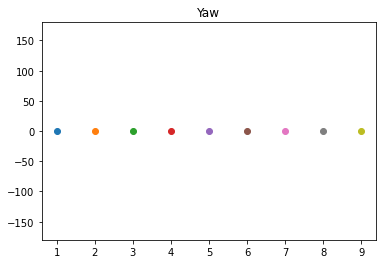

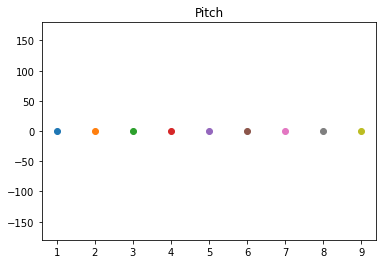

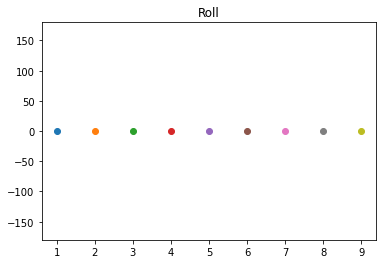

In [ ]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的初始分佈')
plt.scatter(1,init_data1412.Yaw)
plt.scatter(2,init_data1423.Yaw)
plt.scatter(3,init_data1431.Yaw)
plt.scatter(4,init_data1439.Yaw)
plt.scatter(5,init_data1448.Yaw)
plt.scatter(6,init_data1457.Yaw)
plt.scatter(7,init_data1510.Yaw)
plt.scatter(8,init_data1519.Yaw)
plt.scatter(9,init_data1527.Yaw)
plt.ylim(-180,180)
plt.title('Yaw')
plt.show()
plt.scatter(1,init_data1412.Pitch)
plt.scatter(2,init_data1423.Pitch)
plt.scatter(3,init_data1431.Pitch)
plt.scatter(4,init_data1439.Pitch)
plt.scatter(5,init_data1448.Pitch)
plt.scatter(6,init_data1457.Pitch)
plt.scatter(7,init_data1510.Pitch)
plt.scatter(8,init_data1519.Pitch)
plt.scatter(9,init_data1527.Pitch)
plt.ylim(-180,180)
plt.title('Pitch')
plt.show()
plt.scatter(1,init_data1412.Roll)
plt.scatter(2,init_data1423.Roll)
plt.scatter(3,init_data1431.Roll)
plt.scatter(4,init_data1439.Roll)
plt.scatter(5,init_data1448.Roll)
plt.scatter(6,init_data1457.Roll)
plt.scatter(7,init_data1510.Roll)
plt.scatter(8,init_data1519.Roll)
plt.scatter(9,init_data1527.Roll)
plt.ylim(-180,180)
plt.title('Roll')
plt.show()

Yaw/Pitch/Roll的校正分佈
2    31.60759
Name: Yaw, dtype: float64


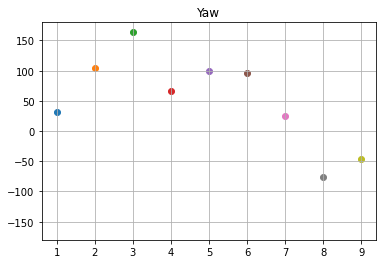

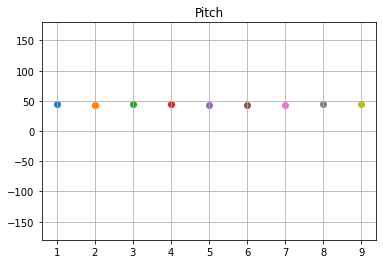

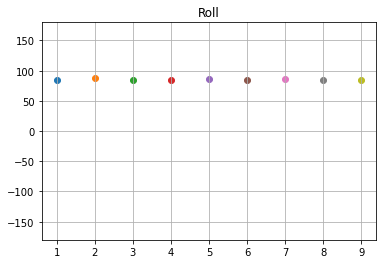

In [ ]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的校正分佈')
print(calibration_data1412.Yaw,)
plt.scatter(1,calibration_data1412.Yaw)
plt.scatter(2,calibration_data1423.Yaw)
plt.scatter(3,calibration_data1431.Yaw)
plt.scatter(4,calibration_data1439.Yaw)
plt.scatter(5,calibration_data1448.Yaw)
plt.scatter(6,calibration_data1457.Yaw)
plt.scatter(7,calibration_data1510.Yaw)
plt.scatter(8,calibration_data1519.Yaw)
plt.scatter(9,calibration_data1527.Yaw)
plt.title('Yaw')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Pitch)
plt.scatter(2,calibration_data1423.Pitch)
plt.scatter(3,calibration_data1431.Pitch)
plt.scatter(4,calibration_data1439.Pitch)
plt.scatter(5,calibration_data1448.Pitch)
plt.scatter(6,calibration_data1457.Pitch)
plt.scatter(7,calibration_data1510.Pitch)
plt.scatter(8,calibration_data1519.Pitch)
plt.scatter(9,calibration_data1527.Pitch)
plt.title('Pitch')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Roll)
plt.scatter(2,calibration_data1423.Roll)
plt.scatter(3,calibration_data1431.Roll)
plt.scatter(4,calibration_data1439.Roll)
plt.scatter(5,calibration_data1448.Roll)
plt.scatter(6,calibration_data1457.Roll)
plt.scatter(7,calibration_data1510.Roll)
plt.scatter(8,calibration_data1519.Roll)
plt.scatter(9,calibration_data1527.Roll)
plt.title('Roll')
plt.ylim(-180,180)
plt.grid()
plt.show()

In [ ]:
#將每一個Yaw時序動態點扣除校正點
#print(dynamic_data1527)#測試
calibration_dynamic_data1412Yaw = dynamic_data1412.Yaw - calibration_data1412.Yaw[2]

calibration_dynamic_data1423Yaw = dynamic_data1423.Yaw - calibration_data1423.Yaw[2]

#calibration_dynamic_data1431Yaw = dynamic_data1431.Yaw - calibration_data1431.Yaw[2]#有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1431.Yaw:
  if i <=0:
    i=i+360

  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1431.Yaw.index)
calibration_dynamic_data1431Yaw = eulerSet_pdChange - calibration_data1431.Yaw[2]

calibration_dynamic_data1439Yaw = dynamic_data1439.Yaw - calibration_data1439.Yaw[2]

calibration_dynamic_data1448Yaw = dynamic_data1448.Yaw - calibration_data1448.Yaw[2]

calibration_dynamic_data1457Yaw = dynamic_data1457.Yaw - calibration_data1457.Yaw[2]

calibration_dynamic_data1510Yaw = dynamic_data1510.Yaw - calibration_data1510.Yaw[2]

calibration_dynamic_data1519Yaw = dynamic_data1519.Yaw - calibration_data1519.Yaw[2]

calibration_dynamic_data1527Yaw = dynamic_data1527.Yaw - calibration_data1527.Yaw[2]


#將每一個Roll時序動態點扣除校正點

calibration_dynamic_data1412Roll = dynamic_data1412.Roll - calibration_data1412.Roll[2]

calibration_dynamic_data1423Roll = dynamic_data1423.Roll - calibration_data1423.Roll[2]

calibration_dynamic_data1431Roll = dynamic_data1431.Roll - calibration_data1431.Roll[2]

calibration_dynamic_data1439Roll = dynamic_data1439.Roll - calibration_data1439.Roll[2]

calibration_dynamic_data1448Roll = dynamic_data1448.Roll - calibration_data1448.Roll[2]

calibration_dynamic_data1457Roll = dynamic_data1457.Roll - calibration_data1457.Roll[2]

calibration_dynamic_data1510Roll = dynamic_data1510.Roll - calibration_data1510.Roll[2]

calibration_dynamic_data1519Roll = dynamic_data1519.Roll - calibration_data1519.Roll[2]

calibration_dynamic_data1527Roll = dynamic_data1527.Roll - calibration_data1527.Roll[2]


#將每一個Pitch時序動態點扣除校正點

calibration_dynamic_data1412Pitch = dynamic_data1412.Pitch - calibration_data1412.Pitch[2]

calibration_dynamic_data1423Pitch = dynamic_data1423.Pitch - calibration_data1423.Pitch[2]

calibration_dynamic_data1431Pitch = dynamic_data1431.Pitch - calibration_data1431.Pitch[2]

calibration_dynamic_data1439Pitch = dynamic_data1439.Pitch - calibration_data1439.Pitch[2]

calibration_dynamic_data1448Pitch = dynamic_data1448.Pitch - calibration_data1448.Pitch[2]

calibration_dynamic_data1457Pitch = dynamic_data1457.Pitch - calibration_data1457.Pitch[2]

calibration_dynamic_data1510Pitch = dynamic_data1510.Pitch - calibration_data1510.Pitch[2]

calibration_dynamic_data1519Pitch = dynamic_data1519.Pitch - calibration_data1519.Pitch[2]

calibration_dynamic_data1527Pitch = dynamic_data1527.Pitch - calibration_data1527.Pitch[2]


'''
#若有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1457.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1457.Yaw.index)
calibration_dynamic_data1457Yaw = eulerSet_pdChange - calibration_data1457.Yaw[2]
'''

Yaw90度角旋轉數據


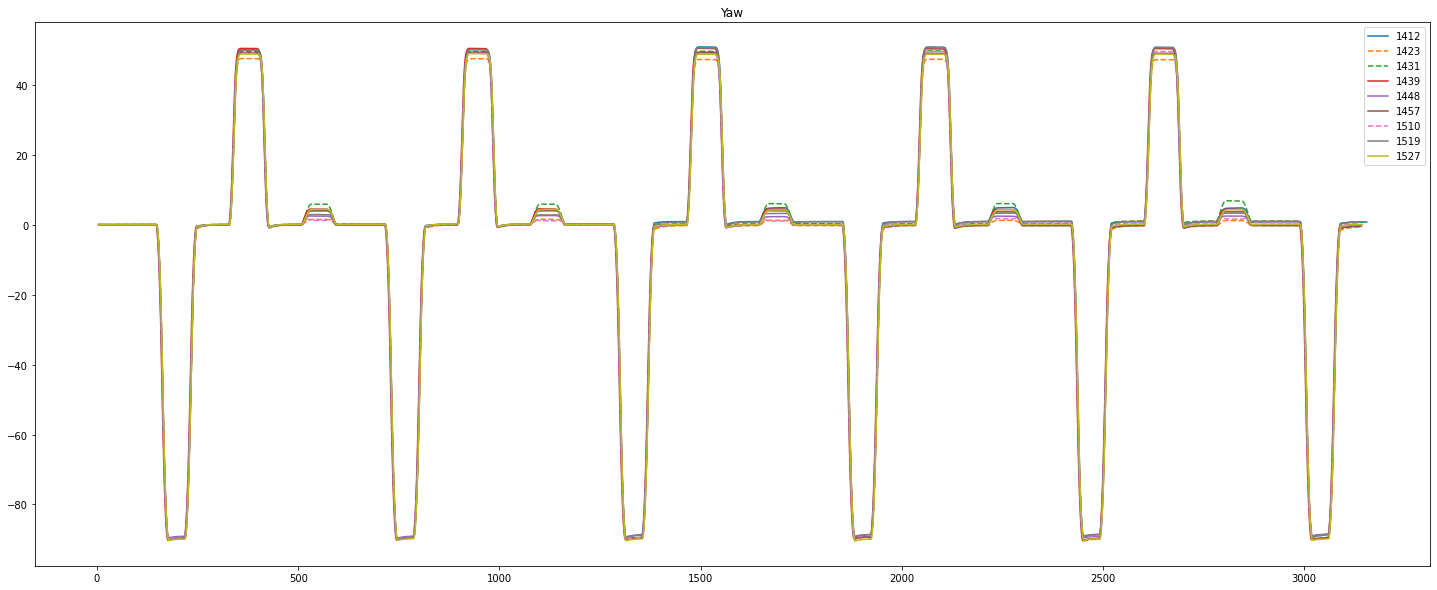

Roll90度角旋轉數據


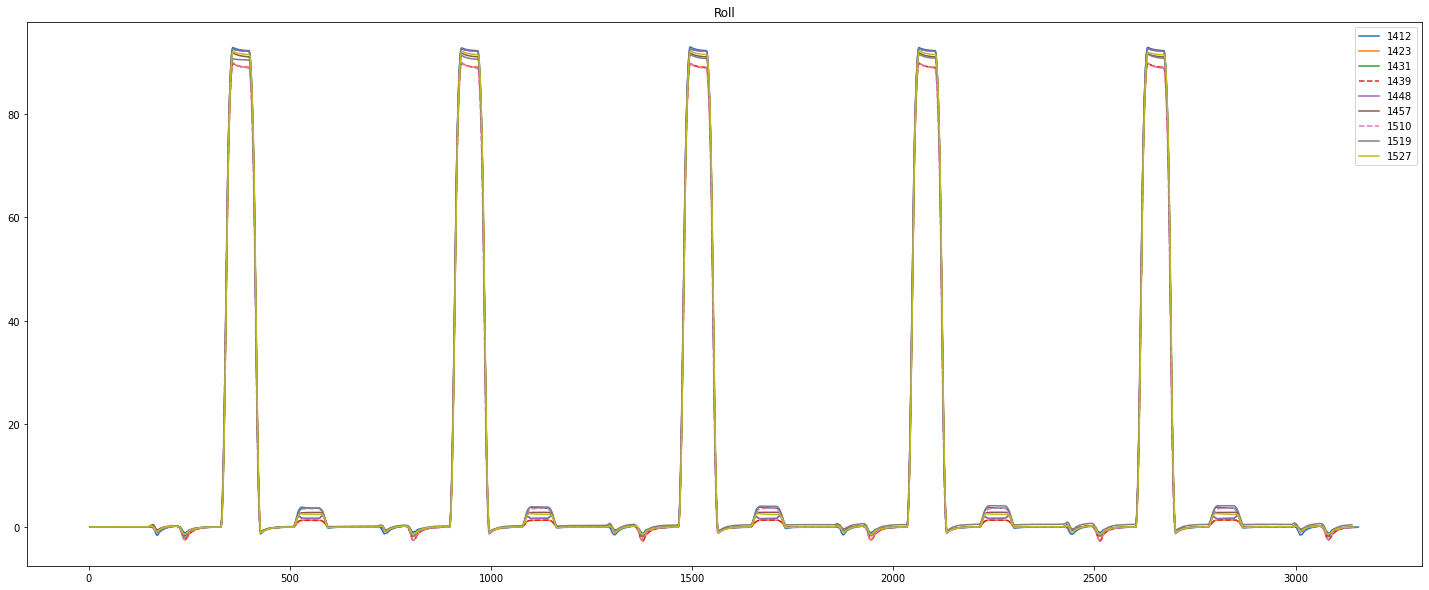

Pitch90度角旋轉數據


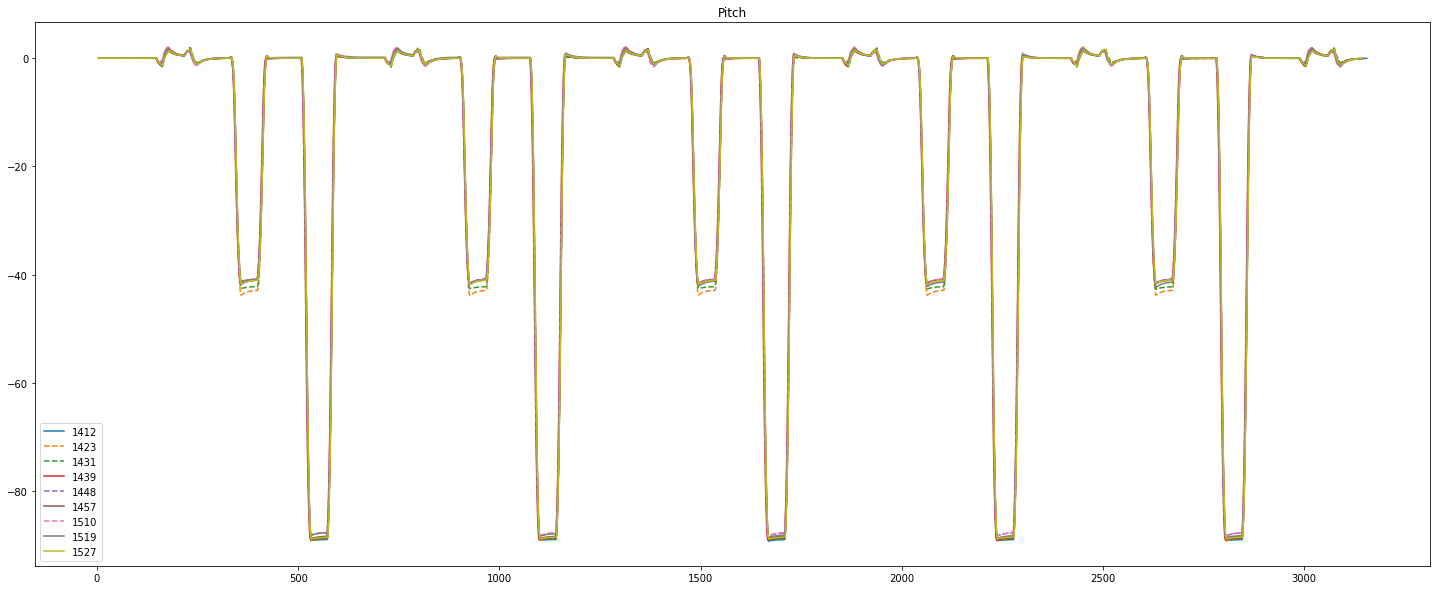

In [ ]:
#動態角度變化(校正後)
from matplotlib import pyplot as plt
print('Yaw90度角旋轉數據')
mylabels = ['1412','1423','1431','1439','1448','1457','1510','1519','1527']
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Yaw,label = 1412)
plt.plot(calibration_dynamic_data1423Yaw,label = 1423,linestyle = 'dashed')
plt.plot(calibration_dynamic_data1431Yaw,label = 1431,linestyle = 'dashed')
plt.plot(calibration_dynamic_data1439Yaw,label = 1439)
plt.plot(calibration_dynamic_data1448Yaw,label = 1448)
plt.plot(calibration_dynamic_data1457Yaw,label = 1457)
plt.plot(calibration_dynamic_data1510Yaw,label = 1510,linestyle = 'dashed')
plt.plot(calibration_dynamic_data1519Yaw,label = 1519)
plt.plot(calibration_dynamic_data1527Yaw,label = 1527)
plt.legend()
plt.title('Yaw')

plt.show()

print('Roll90度角旋轉數據')
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Roll,label = '1412')
plt.plot(calibration_dynamic_data1423Roll,label = '1423')
plt.plot(calibration_dynamic_data1431Roll,label = '1431')
plt.plot(calibration_dynamic_data1423Roll,label = '1439',linestyle = 'dashed')# , marker='o')
plt.plot(calibration_dynamic_data1431Roll,label = '1448')
plt.plot(calibration_dynamic_data1457Roll,label = '1457')
plt.plot(calibration_dynamic_data1510Roll,label = '1510',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1519Roll,label = '1519')
plt.plot(calibration_dynamic_data1527Roll,label = '1527')
plt.legend()
plt.title('Roll')
plt.show()

print('Pitch90度角旋轉數據')
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Pitch,label = '1412')
plt.plot(calibration_dynamic_data1423Pitch,label = '1423',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1431Pitch,label = '1431',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1439Pitch,label = '1439')
plt.plot(calibration_dynamic_data1448Pitch,label = '1448',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1457Pitch,label = '1457')
plt.plot(calibration_dynamic_data1510Pitch,label = '1510',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1519Pitch,label = '1519')
plt.plot(calibration_dynamic_data1527Pitch,label = '1527')
plt.legend()
plt.title('Pitch')
plt.show()

## 小結:1423(*2)/1431(*2)/1439(*1)/1448(*1)/1510(*3),以上4顆較為不同

# 第二次QA

In [ ]:
#Data一覽
!ls gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/

'20220722(1610).csv'  '20220722(1637).csv'  '20220722(1701).csv'
'20220722(1618).csv'  '20220722(1645).csv'  '20220722(1708).csv'
'20220722(1626).csv'  '20220722(1653).csv'  '20220722(1716).csv'


In [ ]:
#動態訊號分析7/22
import pandas as pd
usecols = ['Yaw', 'Pitch', 'Roll']
skiprows = 2

#1
data1412 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1610).csv',skiprows=skiprows,usecols=usecols)
init_data1412 = data1412[0:1]
init_data1412['Yaw'] =init_data1412['Yaw'].astype(float)
init_data1412['Pitch'] =init_data1412['Pitch'].astype(float)
init_data1412['Roll'] =init_data1412['Roll'].astype(float)

calibration_data1412 = data1412[2:3]
calibration_data1412['Yaw'] =calibration_data1412['Yaw'].astype(float)
calibration_data1412['Pitch'] =calibration_data1412['Pitch'].astype(float)
calibration_data1412['Roll'] =calibration_data1412['Roll'].astype(float)

dynamic_data1412 = data1412[4:]
dynamic_data1412['Yaw'] =dynamic_data1412['Yaw'].astype(float)
dynamic_data1412['Pitch'] =dynamic_data1412['Pitch'].astype(float)
dynamic_data1412['Roll'] =dynamic_data1412['Roll'].astype(float)

#2
data1423 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1618).csv',skiprows=skiprows,usecols=usecols)
init_data1423 = data1423[0:1]
init_data1423['Yaw'] =init_data1423['Yaw'].astype(float)
init_data1423['Pitch'] =init_data1423['Pitch'].astype(float)
init_data1423['Roll'] =init_data1423['Roll'].astype(float)

calibration_data1423 = data1423[2:3]
calibration_data1423['Yaw'] =calibration_data1423['Yaw'].astype(float)
calibration_data1423['Pitch'] =calibration_data1423['Pitch'].astype(float)
calibration_data1423['Roll'] =calibration_data1423['Roll'].astype(float)

dynamic_data1423 = data1423[4:]
dynamic_data1423['Yaw'] =dynamic_data1423['Yaw'].astype(float)
dynamic_data1423['Pitch'] =dynamic_data1423['Pitch'].astype(float)
dynamic_data1423['Roll'] =dynamic_data1423['Roll'].astype(float)

#3
data1431 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1626).csv',skiprows=skiprows,usecols=usecols)
init_data1431 = data1431[0:1]
init_data1431['Yaw'] =init_data1431['Yaw'].astype(float)
init_data1431['Pitch'] =init_data1431['Pitch'].astype(float)
init_data1431['Roll'] =init_data1431['Roll'].astype(float)

calibration_data1431 = data1431[2:3]
calibration_data1431['Yaw'] =calibration_data1431['Yaw'].astype(float)
calibration_data1431['Pitch'] =calibration_data1431['Pitch'].astype(float)
calibration_data1431['Roll'] =calibration_data1431['Roll'].astype(float)

dynamic_data1431 = data1431[4:]
dynamic_data1431['Yaw'] =dynamic_data1431['Yaw'].astype(float)
dynamic_data1431['Pitch'] =dynamic_data1431['Pitch'].astype(float)
dynamic_data1431['Roll'] =dynamic_data1431['Roll'].astype(float)

#4
data1439 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1637).csv',skiprows=skiprows,usecols=usecols)
init_data1439 = data1439[0:1]
init_data1439['Yaw'] =init_data1439['Yaw'].astype(float)
init_data1439['Pitch'] =init_data1439['Pitch'].astype(float)
init_data1439['Roll'] =init_data1439['Roll'].astype(float)

calibration_data1439 = data1439[2:3]
calibration_data1439['Yaw'] =calibration_data1439['Yaw'].astype(float)
calibration_data1439['Pitch'] =calibration_data1439['Pitch'].astype(float)
calibration_data1439['Roll'] =calibration_data1439['Roll'].astype(float)

dynamic_data1439 = data1439[4:]
dynamic_data1439['Yaw'] =dynamic_data1439['Yaw'].astype(float)
dynamic_data1439['Pitch'] =dynamic_data1439['Pitch'].astype(float)
dynamic_data1439['Roll'] =dynamic_data1439['Roll'].astype(float)

#5
data1448 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1645).csv',skiprows=skiprows,usecols=usecols)
init_data1448 = data1448[0:1]
init_data1448['Yaw'] =init_data1448['Yaw'].astype(float)
init_data1448['Pitch'] =init_data1448['Pitch'].astype(float)
init_data1448['Roll'] =init_data1448['Roll'].astype(float)

calibration_data1448 = data1448[2:3]
calibration_data1448['Yaw'] =calibration_data1448['Yaw'].astype(float)
calibration_data1448['Pitch'] =calibration_data1448['Pitch'].astype(float)
calibration_data1448['Roll'] =calibration_data1448['Roll'].astype(float)

dynamic_data1448 = data1448[4:]
dynamic_data1448['Yaw'] =dynamic_data1448['Yaw'].astype(float)
dynamic_data1448['Pitch'] =dynamic_data1448['Pitch'].astype(float)
dynamic_data1448['Roll'] =dynamic_data1448['Roll'].astype(float)

#6
data1457 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1653).csv',skiprows=skiprows,usecols=usecols)
init_data1457 = data1457[0:1]
init_data1457['Yaw'] =init_data1457['Yaw'].astype(float)
init_data1457['Pitch'] =init_data1457['Pitch'].astype(float)
init_data1457['Roll'] =init_data1457['Roll'].astype(float)

calibration_data1457 = data1457[2:3]
calibration_data1457['Yaw'] =calibration_data1457['Yaw'].astype(float)
calibration_data1457['Pitch'] =calibration_data1457['Pitch'].astype(float)
calibration_data1457['Roll'] =calibration_data1457['Roll'].astype(float)

dynamic_data1457 = data1457[4:]
dynamic_data1457['Yaw'] =dynamic_data1457['Yaw'].astype(float)
dynamic_data1457['Pitch'] =dynamic_data1457['Pitch'].astype(float)
dynamic_data1457['Roll'] =dynamic_data1457['Roll'].astype(float)

#7
data1510 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1701).csv',skiprows=skiprows,usecols=usecols)
init_data1510 = data1510[0:1]
init_data1510['Yaw'] =init_data1510['Yaw'].astype(float)
init_data1510['Pitch'] =init_data1510['Pitch'].astype(float)
init_data1510['Roll'] =init_data1510['Roll'].astype(float)

calibration_data1510 = data1510[2:3]
calibration_data1510['Yaw'] =calibration_data1510['Yaw'].astype(float)
calibration_data1510['Pitch'] =calibration_data1510['Pitch'].astype(float)
calibration_data1510['Roll'] =calibration_data1510['Roll'].astype(float)

dynamic_data1510 = data1510[4:]
dynamic_data1510['Yaw'] =dynamic_data1510['Yaw'].astype(float)
dynamic_data1510['Pitch'] =dynamic_data1510['Pitch'].astype(float)
dynamic_data1510['Roll'] =dynamic_data1510['Roll'].astype(float)

#8
data1519 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1708).csv',skiprows=skiprows,usecols=usecols)
init_data1519 = data1519[0:1]
init_data1519['Yaw'] =init_data1519['Yaw'].astype(float)
init_data1519['Pitch'] =init_data1519['Pitch'].astype(float)
init_data1519['Roll'] =init_data1519['Roll'].astype(float)

calibration_data1519 = data1519[2:3]
calibration_data1519['Yaw'] =calibration_data1519['Yaw'].astype(float)
calibration_data1519['Pitch'] =calibration_data1519['Pitch'].astype(float)
calibration_data1519['Roll'] =calibration_data1519['Roll'].astype(float)

dynamic_data1519 = data1519[4:]
dynamic_data1519['Yaw'] =dynamic_data1519['Yaw'].astype(float)
dynamic_data1519['Pitch'] =dynamic_data1519['Pitch'].astype(float)
dynamic_data1519['Roll'] =dynamic_data1519['Roll'].astype(float)

#9
data1527 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220722/20220722(1716).csv',skiprows=skiprows,usecols=usecols)
init_data1527 = data1527.iloc[0:1]
init_data1527['Yaw'] =init_data1527['Yaw'].astype(float)
init_data1527['Pitch'] =init_data1527['Pitch'].astype(float)
init_data1527['Roll'] =init_data1527['Roll'].astype(float)

calibration_data1527 = data1527.iloc[2:3]
calibration_data1527['Yaw'] =calibration_data1527['Yaw'].astype(float)
calibration_data1527['Pitch'] =calibration_data1527['Pitch'].astype(float)
calibration_data1527['Roll'] =calibration_data1527['Roll'].astype(float)

dynamic_data1527 = data1527.iloc[4:]
dynamic_data1527['Yaw'] =dynamic_data1527['Yaw'].astype(float)
dynamic_data1527['Pitch'] =dynamic_data1527['Pitch'].astype(float)
dynamic_data1527['Roll'] =dynamic_data1527['Roll'].astype(float)

Yaw/Pitch/Roll的初始分佈


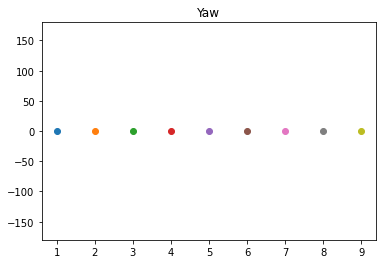

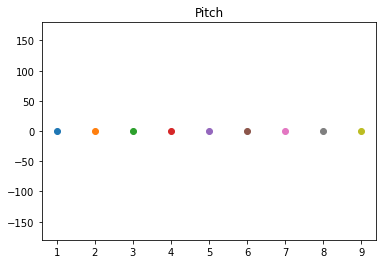

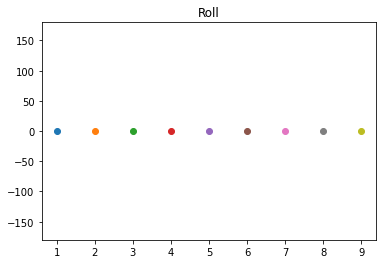

In [ ]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的初始分佈')
plt.scatter(1,init_data1412.Yaw)
plt.scatter(2,init_data1423.Yaw)
plt.scatter(3,init_data1431.Yaw)
plt.scatter(4,init_data1439.Yaw)
plt.scatter(5,init_data1448.Yaw)
plt.scatter(6,init_data1457.Yaw)
plt.scatter(7,init_data1510.Yaw)
plt.scatter(8,init_data1519.Yaw)
plt.scatter(9,init_data1527.Yaw)
plt.ylim(-180,180)
plt.title('Yaw')
plt.show()
plt.scatter(1,init_data1412.Pitch)
plt.scatter(2,init_data1423.Pitch)
plt.scatter(3,init_data1431.Pitch)
plt.scatter(4,init_data1439.Pitch)
plt.scatter(5,init_data1448.Pitch)
plt.scatter(6,init_data1457.Pitch)
plt.scatter(7,init_data1510.Pitch)
plt.scatter(8,init_data1519.Pitch)
plt.scatter(9,init_data1527.Pitch)
plt.ylim(-180,180)
plt.title('Pitch')
plt.show()
plt.scatter(1,init_data1412.Roll)
plt.scatter(2,init_data1423.Roll)
plt.scatter(3,init_data1431.Roll)
plt.scatter(4,init_data1439.Roll)
plt.scatter(5,init_data1448.Roll)
plt.scatter(6,init_data1457.Roll)
plt.scatter(7,init_data1510.Roll)
plt.scatter(8,init_data1519.Roll)
plt.scatter(9,init_data1527.Roll)
plt.ylim(-180,180)
plt.title('Roll')
plt.show()

Yaw/Pitch/Roll的校正分佈
2   -172.1941
Name: Yaw, dtype: float64


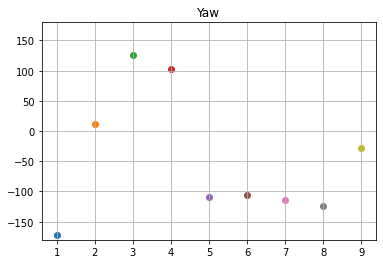

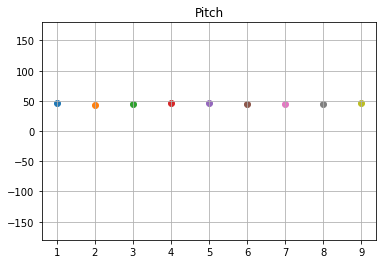

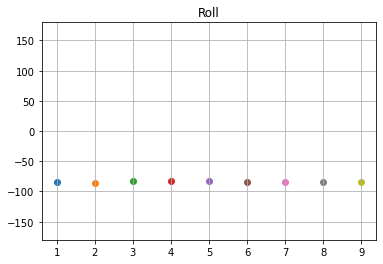

In [ ]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的校正分佈')
print(calibration_data1412.Yaw,)
plt.scatter(1,calibration_data1412.Yaw)
plt.scatter(2,calibration_data1423.Yaw)
plt.scatter(3,calibration_data1431.Yaw)
plt.scatter(4,calibration_data1439.Yaw)
plt.scatter(5,calibration_data1448.Yaw)
plt.scatter(6,calibration_data1457.Yaw)
plt.scatter(7,calibration_data1510.Yaw)
plt.scatter(8,calibration_data1519.Yaw)
plt.scatter(9,calibration_data1527.Yaw)
plt.title('Yaw')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Pitch)
plt.scatter(2,calibration_data1423.Pitch)
plt.scatter(3,calibration_data1431.Pitch)
plt.scatter(4,calibration_data1439.Pitch)
plt.scatter(5,calibration_data1448.Pitch)
plt.scatter(6,calibration_data1457.Pitch)
plt.scatter(7,calibration_data1510.Pitch)
plt.scatter(8,calibration_data1519.Pitch)
plt.scatter(9,calibration_data1527.Pitch)
plt.title('Pitch')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Roll)
plt.scatter(2,calibration_data1423.Roll)
plt.scatter(3,calibration_data1431.Roll)
plt.scatter(4,calibration_data1439.Roll)
plt.scatter(5,calibration_data1448.Roll)
plt.scatter(6,calibration_data1457.Roll)
plt.scatter(7,calibration_data1510.Roll)
plt.scatter(8,calibration_data1519.Roll)
plt.scatter(9,calibration_data1527.Roll)
plt.title('Roll')
plt.ylim(-180,180)
plt.grid()
plt.show()

In [ ]:
#將每一個Yaw時序動態點扣除校正點
#print(dynamic_data1527)#測試
#calibration_dynamic_data1412Yaw = dynamic_data1412.Yaw - calibration_data1412.Yaw[2]
eulerSet = []
for i in dynamic_data1412.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1412.Yaw.index)
calibration_dynamic_data1412Yaw = eulerSet_pdChange - calibration_data1412.Yaw[2]

calibration_dynamic_data1423Yaw = dynamic_data1423.Yaw - calibration_data1423.Yaw[2]

calibration_dynamic_data1431Yaw = dynamic_data1431.Yaw - calibration_data1431.Yaw[2]

calibration_dynamic_data1439Yaw = dynamic_data1439.Yaw - calibration_data1439.Yaw[2]

#calibration_dynamic_data1448Yaw = dynamic_data1448.Yaw - calibration_data1448.Yaw[2]
eulerSet = []
for i in dynamic_data1448.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1448.Yaw.index)
calibration_dynamic_data1448Yaw = eulerSet_pdChange - calibration_data1448.Yaw[2]

#calibration_dynamic_data1457Yaw = dynamic_data1457.Yaw - calibration_data1457.Yaw[2]
eulerSet = []
for i in dynamic_data1457.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1457.Yaw.index)
calibration_dynamic_data1457Yaw = eulerSet_pdChange - calibration_data1457.Yaw[2]
#calibration_dynamic_data1510Yaw = dynamic_data1510.Yaw - calibration_data1510.Yaw[2]
eulerSet = []
for i in dynamic_data1510.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1510.Yaw.index)
calibration_dynamic_data1510Yaw = eulerSet_pdChange - calibration_data1510.Yaw[2]

#calibration_dynamic_data1519Yaw = dynamic_data1519.Yaw - calibration_data1519.Yaw[2]
eulerSet = []
for i in dynamic_data1519.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1519.Yaw.index)
calibration_dynamic_data1519Yaw = eulerSet_pdChange - calibration_data1519.Yaw[2]

#calibration_dynamic_data1527Yaw = dynamic_data1527.Yaw - calibration_data1527.Yaw[2]
eulerSet = []
for i in dynamic_data1527.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1527.Yaw.index)
calibration_dynamic_data1527Yaw = eulerSet_pdChange - calibration_data1527.Yaw[2]

#將每一個Roll時序動態點扣除校正點

calibration_dynamic_data1412Roll = dynamic_data1412.Roll - calibration_data1412.Roll[2]

calibration_dynamic_data1423Roll = dynamic_data1423.Roll - calibration_data1423.Roll[2]

calibration_dynamic_data1431Roll = dynamic_data1431.Roll - calibration_data1431.Roll[2]

calibration_dynamic_data1439Roll = dynamic_data1439.Roll - calibration_data1439.Roll[2]

calibration_dynamic_data1448Roll = dynamic_data1448.Roll - calibration_data1448.Roll[2]

calibration_dynamic_data1457Roll = dynamic_data1457.Roll - calibration_data1457.Roll[2]

calibration_dynamic_data1510Roll = dynamic_data1510.Roll - calibration_data1510.Roll[2]

calibration_dynamic_data1519Roll = dynamic_data1519.Roll - calibration_data1519.Roll[2]

calibration_dynamic_data1527Roll = dynamic_data1527.Roll - calibration_data1527.Roll[2]


#將每一個Pitch時序動態點扣除校正點

calibration_dynamic_data1412Pitch = dynamic_data1412.Pitch - calibration_data1412.Pitch[2]

calibration_dynamic_data1423Pitch = dynamic_data1423.Pitch - calibration_data1423.Pitch[2]

calibration_dynamic_data1431Pitch = dynamic_data1431.Pitch - calibration_data1431.Pitch[2]

calibration_dynamic_data1439Pitch = dynamic_data1439.Pitch - calibration_data1439.Pitch[2]

calibration_dynamic_data1448Pitch = dynamic_data1448.Pitch - calibration_data1448.Pitch[2]

calibration_dynamic_data1457Pitch = dynamic_data1457.Pitch - calibration_data1457.Pitch[2]

calibration_dynamic_data1510Pitch = dynamic_data1510.Pitch - calibration_data1510.Pitch[2]

calibration_dynamic_data1519Pitch = dynamic_data1519.Pitch - calibration_data1519.Pitch[2]

calibration_dynamic_data1527Pitch = dynamic_data1527.Pitch - calibration_data1527.Pitch[2]


'''
#若有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1457.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1457.Yaw.index)
calibration_dynamic_data1457Yaw = eulerSet_pdChange - calibration_data1457.Yaw[2]
'''

In [ ]:
# Yaw負值小於-175度時使它數據往上翻轉(對齊作用)

MaxSet = []
for i in calibration_dynamic_data1412Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1412Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1412Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1423Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1423Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1423Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1431Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1431Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1431Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1439Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1439Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1439Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1448Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1448Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1448Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1457Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1457Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1457Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1510Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1510Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1510Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1519Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1519Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1519Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1527Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1527Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1527Yaw.index)


Yaw90度角旋轉數據


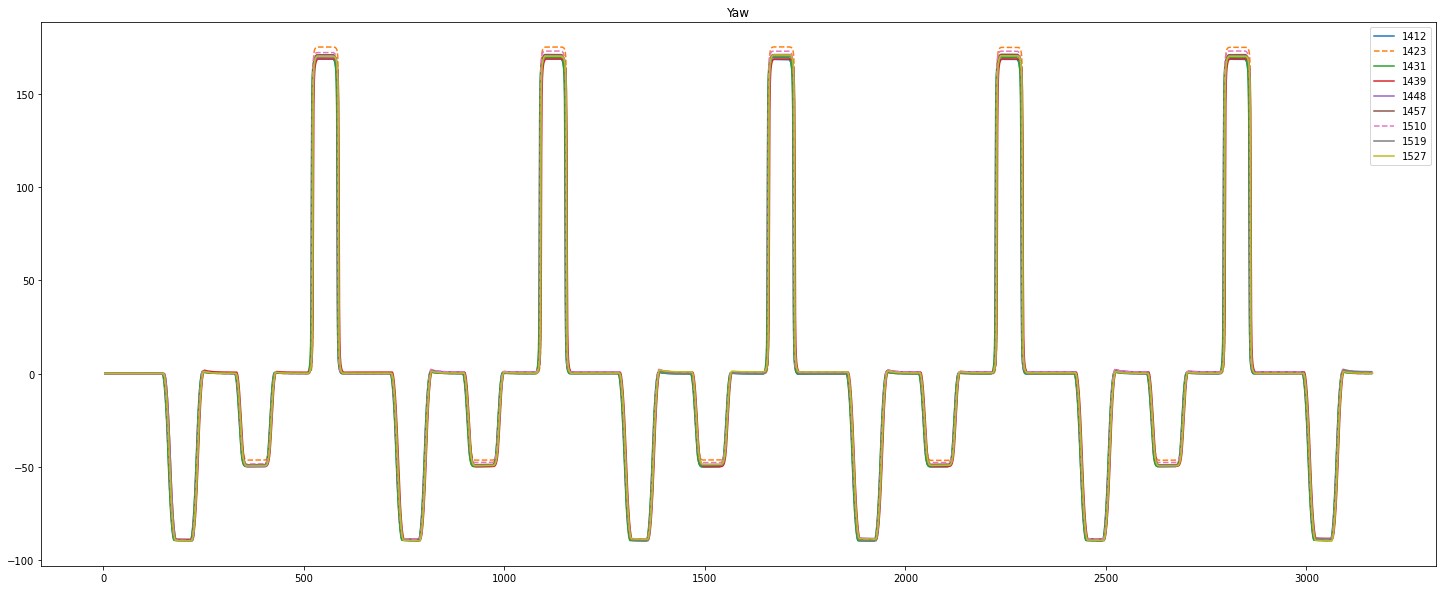

Roll90度角旋轉數據


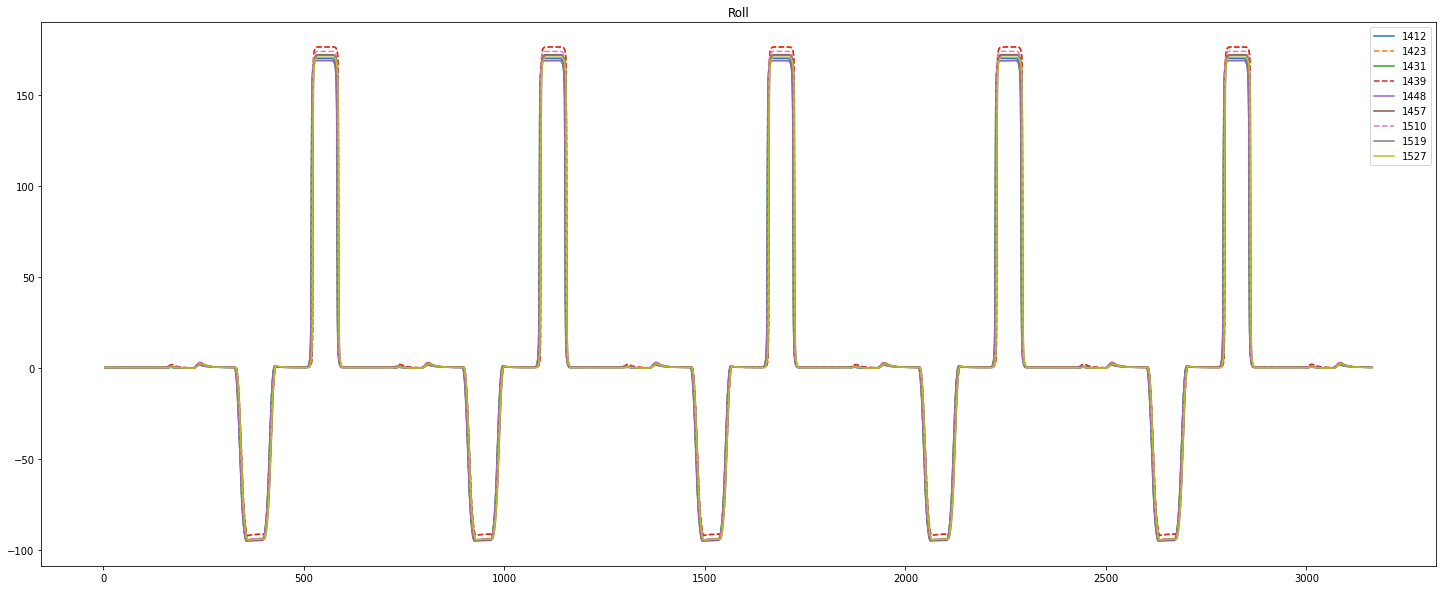

Pitch90度角旋轉數據


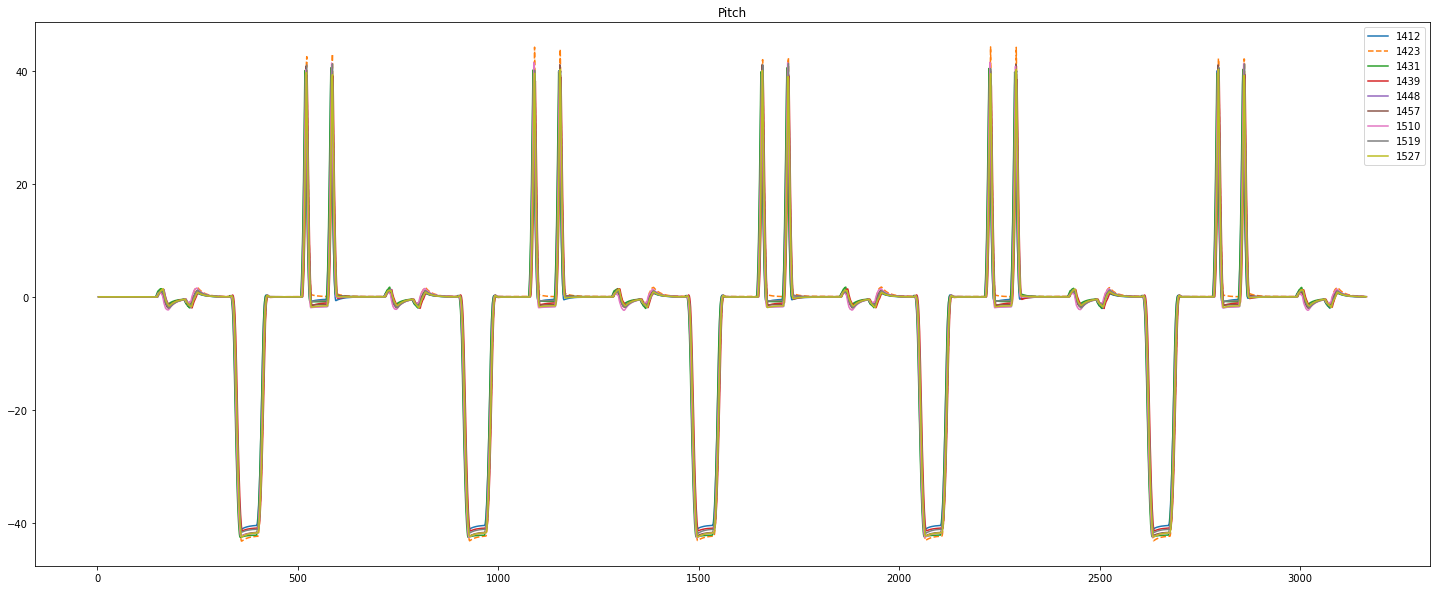

In [ ]:
#動態角度變化(校正後)
from matplotlib import pyplot as plt
print('Yaw90度角旋轉數據')
mylabels = ['1412','1423','1431','1439','1448','1457','1510','1519','1527']
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Yaw,label = 1412)
plt.plot(calibration_dynamic_data1423Yaw,label = 1423,linestyle = 'dashed')
plt.plot(calibration_dynamic_data1431Yaw,label = 1431)
plt.plot(calibration_dynamic_data1439Yaw,label = 1439)
plt.plot(calibration_dynamic_data1448Yaw,label = 1448)
plt.plot(calibration_dynamic_data1457Yaw,label = 1457)
plt.plot(calibration_dynamic_data1510Yaw,label = 1510,linestyle = 'dashed')
plt.plot(calibration_dynamic_data1519Yaw,label = 1519)
plt.plot(calibration_dynamic_data1527Yaw,label = 1527)
plt.legend()
plt.title('Yaw')

plt.show()

print('Roll90度角旋轉數據')
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Roll,label = '1412')
plt.plot(calibration_dynamic_data1423Roll,label = '1423',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1431Roll,label = '1431')
plt.plot(calibration_dynamic_data1423Roll,label = '1439',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1431Roll,label = '1448')
plt.plot(calibration_dynamic_data1457Roll,label = '1457')
plt.plot(calibration_dynamic_data1510Roll,label = '1510',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1519Roll,label = '1519')
plt.plot(calibration_dynamic_data1527Roll,label = '1527')
plt.legend()
plt.title('Roll')
plt.show()

print('Pitch90度角旋轉數據')
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Pitch,label = '1412')
plt.plot(calibration_dynamic_data1423Pitch,label = '1423',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1431Pitch,label = '1431')
plt.plot(calibration_dynamic_data1439Pitch,label = '1439')
plt.plot(calibration_dynamic_data1448Pitch,label = '1448')
plt.plot(calibration_dynamic_data1457Pitch,label = '1457')
plt.plot(calibration_dynamic_data1510Pitch,label = '1510')
plt.plot(calibration_dynamic_data1519Pitch,label = '1519')
plt.plot(calibration_dynamic_data1527Pitch,label = '1527')
plt.legend()
plt.title('Pitch')
plt.show()

## 小結:1423(*2)/1439(*1)/1510(*2),以上3顆較為不同

# 第三次QA

In [ ]:
#Data一覽
!ls gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726

'20220726(1552).csv'  '20220726(1615).csv'  '20220726(1640).csv'
'20220726(1600).csv'  '20220726(1624).csv'  '20220726(1649).csv'
'20220726(1607).csv'  '20220726(1632).csv'  '20220726(1658).csv'


In [ ]:
#動態訊號分析7/15
import pandas as pd
usecols = ['Yaw', 'Pitch', 'Roll']
skiprows = 2

#1
data1412 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1552).csv',skiprows=skiprows,usecols=usecols)
init_data1412 = data1412[0:1]
init_data1412['Yaw'] =init_data1412['Yaw'].astype(float)
init_data1412['Pitch'] =init_data1412['Pitch'].astype(float)
init_data1412['Roll'] =init_data1412['Roll'].astype(float)

calibration_data1412 = data1412[2:3]
calibration_data1412['Yaw'] =calibration_data1412['Yaw'].astype(float)
calibration_data1412['Pitch'] =calibration_data1412['Pitch'].astype(float)
calibration_data1412['Roll'] =calibration_data1412['Roll'].astype(float)

dynamic_data1412 = data1412[4:]
dynamic_data1412['Yaw'] =dynamic_data1412['Yaw'].astype(float)
dynamic_data1412['Pitch'] =dynamic_data1412['Pitch'].astype(float)
dynamic_data1412['Roll'] =dynamic_data1412['Roll'].astype(float)

#2
data1423 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1600).csv',skiprows=skiprows,usecols=usecols)
init_data1423 = data1423[0:1]
init_data1423['Yaw'] =init_data1423['Yaw'].astype(float)
init_data1423['Pitch'] =init_data1423['Pitch'].astype(float)
init_data1423['Roll'] =init_data1423['Roll'].astype(float)

calibration_data1423 = data1423[2:3]
calibration_data1423['Yaw'] =calibration_data1423['Yaw'].astype(float)
calibration_data1423['Pitch'] =calibration_data1423['Pitch'].astype(float)
calibration_data1423['Roll'] =calibration_data1423['Roll'].astype(float)

dynamic_data1423 = data1423[4:]
dynamic_data1423['Yaw'] =dynamic_data1423['Yaw'].astype(float)
dynamic_data1423['Pitch'] =dynamic_data1423['Pitch'].astype(float)
dynamic_data1423['Roll'] =dynamic_data1423['Roll'].astype(float)

#3
data1431 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1607).csv',skiprows=skiprows,usecols=usecols)
init_data1431 = data1431[0:1]
init_data1431['Yaw'] =init_data1431['Yaw'].astype(float)
init_data1431['Pitch'] =init_data1431['Pitch'].astype(float)
init_data1431['Roll'] =init_data1431['Roll'].astype(float)

calibration_data1431 = data1431[2:3]
calibration_data1431['Yaw'] =calibration_data1431['Yaw'].astype(float)
calibration_data1431['Pitch'] =calibration_data1431['Pitch'].astype(float)
calibration_data1431['Roll'] =calibration_data1431['Roll'].astype(float)

dynamic_data1431 = data1431[4:]
dynamic_data1431['Yaw'] =dynamic_data1431['Yaw'].astype(float)
dynamic_data1431['Pitch'] =dynamic_data1431['Pitch'].astype(float)
dynamic_data1431['Roll'] =dynamic_data1431['Roll'].astype(float)

#4
data1439 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1615).csv',skiprows=skiprows,usecols=usecols)
init_data1439 = data1439[0:1]
init_data1439['Yaw'] =init_data1439['Yaw'].astype(float)
init_data1439['Pitch'] =init_data1439['Pitch'].astype(float)
init_data1439['Roll'] =init_data1439['Roll'].astype(float)

calibration_data1439 = data1439[2:3]
calibration_data1439['Yaw'] =calibration_data1439['Yaw'].astype(float)
calibration_data1439['Pitch'] =calibration_data1439['Pitch'].astype(float)
calibration_data1439['Roll'] =calibration_data1439['Roll'].astype(float)

dynamic_data1439 = data1439[4:]
dynamic_data1439['Yaw'] =dynamic_data1439['Yaw'].astype(float)
dynamic_data1439['Pitch'] =dynamic_data1439['Pitch'].astype(float)
dynamic_data1439['Roll'] =dynamic_data1439['Roll'].astype(float)

#5
data1448 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1624).csv',skiprows=skiprows,usecols=usecols)
init_data1448 = data1448[0:1]
init_data1448['Yaw'] =init_data1448['Yaw'].astype(float)
init_data1448['Pitch'] =init_data1448['Pitch'].astype(float)
init_data1448['Roll'] =init_data1448['Roll'].astype(float)

calibration_data1448 = data1448[2:3]
calibration_data1448['Yaw'] =calibration_data1448['Yaw'].astype(float)
calibration_data1448['Pitch'] =calibration_data1448['Pitch'].astype(float)
calibration_data1448['Roll'] =calibration_data1448['Roll'].astype(float)

dynamic_data1448 = data1448[4:]
dynamic_data1448['Yaw'] =dynamic_data1448['Yaw'].astype(float)
dynamic_data1448['Pitch'] =dynamic_data1448['Pitch'].astype(float)
dynamic_data1448['Roll'] =dynamic_data1448['Roll'].astype(float)

#6
data1457 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1632).csv',skiprows=skiprows,usecols=usecols)
init_data1457 = data1457[0:1]
init_data1457['Yaw'] =init_data1457['Yaw'].astype(float)
init_data1457['Pitch'] =init_data1457['Pitch'].astype(float)
init_data1457['Roll'] =init_data1457['Roll'].astype(float)

calibration_data1457 = data1457[2:3]
calibration_data1457['Yaw'] =calibration_data1457['Yaw'].astype(float)
calibration_data1457['Pitch'] =calibration_data1457['Pitch'].astype(float)
calibration_data1457['Roll'] =calibration_data1457['Roll'].astype(float)

dynamic_data1457 = data1457[4:]
dynamic_data1457['Yaw'] =dynamic_data1457['Yaw'].astype(float)
dynamic_data1457['Pitch'] =dynamic_data1457['Pitch'].astype(float)
dynamic_data1457['Roll'] =dynamic_data1457['Roll'].astype(float)

#7
data1510 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1640).csv',skiprows=skiprows,usecols=usecols)
init_data1510 = data1510[0:1]
init_data1510['Yaw'] =init_data1510['Yaw'].astype(float)
init_data1510['Pitch'] =init_data1510['Pitch'].astype(float)
init_data1510['Roll'] =init_data1510['Roll'].astype(float)

calibration_data1510 = data1510[2:3]
calibration_data1510['Yaw'] =calibration_data1510['Yaw'].astype(float)
calibration_data1510['Pitch'] =calibration_data1510['Pitch'].astype(float)
calibration_data1510['Roll'] =calibration_data1510['Roll'].astype(float)

dynamic_data1510 = data1510[4:]
dynamic_data1510['Yaw'] =dynamic_data1510['Yaw'].astype(float)
dynamic_data1510['Pitch'] =dynamic_data1510['Pitch'].astype(float)
dynamic_data1510['Roll'] =dynamic_data1510['Roll'].astype(float)

#8
data1519 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1649).csv',skiprows=skiprows,usecols=usecols)
init_data1519 = data1519[0:1]
init_data1519['Yaw'] =init_data1519['Yaw'].astype(float)
init_data1519['Pitch'] =init_data1519['Pitch'].astype(float)
init_data1519['Roll'] =init_data1519['Roll'].astype(float)

calibration_data1519 = data1519[2:3]
calibration_data1519['Yaw'] =calibration_data1519['Yaw'].astype(float)
calibration_data1519['Pitch'] =calibration_data1519['Pitch'].astype(float)
calibration_data1519['Roll'] =calibration_data1519['Roll'].astype(float)

dynamic_data1519 = data1519[4:]
dynamic_data1519['Yaw'] =dynamic_data1519['Yaw'].astype(float)
dynamic_data1519['Pitch'] =dynamic_data1519['Pitch'].astype(float)
dynamic_data1519['Roll'] =dynamic_data1519['Roll'].astype(float)

#9
data1527 = pd.read_csv('gdrive/MyDrive/ColabWorkspace/7-15智復寶系統QA分析/Data/Data--20220726/20220726(1658).csv',skiprows=skiprows,usecols=usecols)
init_data1527 = data1527.iloc[0:1]
init_data1527['Yaw'] =init_data1527['Yaw'].astype(float)
init_data1527['Pitch'] =init_data1527['Pitch'].astype(float)
init_data1527['Roll'] =init_data1527['Roll'].astype(float)

calibration_data1527 = data1527.iloc[2:3]
calibration_data1527['Yaw'] =calibration_data1527['Yaw'].astype(float)
calibration_data1527['Pitch'] =calibration_data1527['Pitch'].astype(float)
calibration_data1527['Roll'] =calibration_data1527['Roll'].astype(float)

dynamic_data1527 = data1527.iloc[4:]
dynamic_data1527['Yaw'] =dynamic_data1527['Yaw'].astype(float)
dynamic_data1527['Pitch'] =dynamic_data1527['Pitch'].astype(float)
dynamic_data1527['Roll'] =dynamic_data1527['Roll'].astype(float)

Yaw/Pitch/Roll的初始分佈


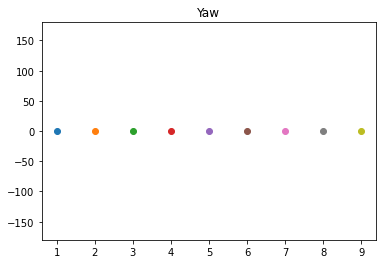

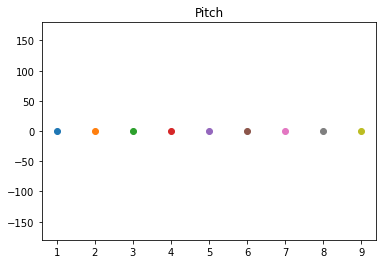

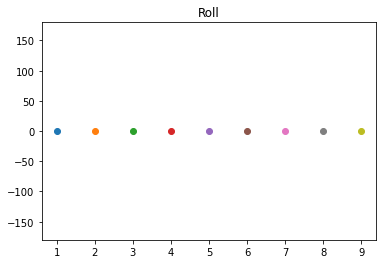

In [ ]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的初始分佈')
plt.scatter(1,init_data1412.Yaw)
plt.scatter(2,init_data1423.Yaw)
plt.scatter(3,init_data1431.Yaw)
plt.scatter(4,init_data1439.Yaw)
plt.scatter(5,init_data1448.Yaw)
plt.scatter(6,init_data1457.Yaw)
plt.scatter(7,init_data1510.Yaw)
plt.scatter(8,init_data1519.Yaw)
plt.scatter(9,init_data1527.Yaw)
plt.ylim(-180,180)
plt.title('Yaw')
plt.show()
plt.scatter(1,init_data1412.Pitch)
plt.scatter(2,init_data1423.Pitch)
plt.scatter(3,init_data1431.Pitch)
plt.scatter(4,init_data1439.Pitch)
plt.scatter(5,init_data1448.Pitch)
plt.scatter(6,init_data1457.Pitch)
plt.scatter(7,init_data1510.Pitch)
plt.scatter(8,init_data1519.Pitch)
plt.scatter(9,init_data1527.Pitch)
plt.ylim(-180,180)
plt.title('Pitch')
plt.show()
plt.scatter(1,init_data1412.Roll)
plt.scatter(2,init_data1423.Roll)
plt.scatter(3,init_data1431.Roll)
plt.scatter(4,init_data1439.Roll)
plt.scatter(5,init_data1448.Roll)
plt.scatter(6,init_data1457.Roll)
plt.scatter(7,init_data1510.Roll)
plt.scatter(8,init_data1519.Roll)
plt.scatter(9,init_data1527.Roll)
plt.ylim(-180,180)
plt.title('Roll')
plt.show()

Yaw/Pitch/Roll的校正分佈
2   -84.48406
Name: Yaw, dtype: float64


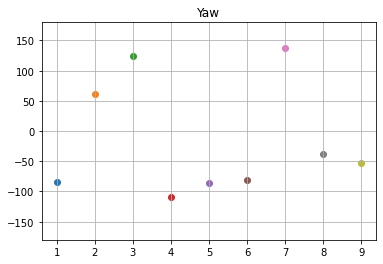

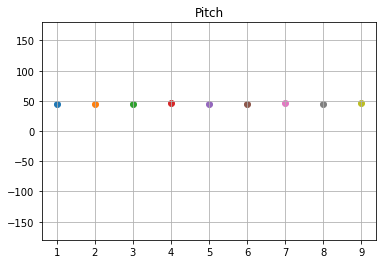

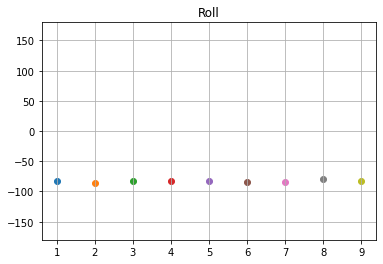

In [ ]:
from matplotlib import pyplot as plt
print('Yaw/Pitch/Roll的校正分佈')
print(calibration_data1412.Yaw,)
plt.scatter(1,calibration_data1412.Yaw)
plt.scatter(2,calibration_data1423.Yaw)
plt.scatter(3,calibration_data1431.Yaw)
plt.scatter(4,calibration_data1439.Yaw)
plt.scatter(5,calibration_data1448.Yaw)
plt.scatter(6,calibration_data1457.Yaw)
plt.scatter(7,calibration_data1510.Yaw)
plt.scatter(8,calibration_data1519.Yaw)
plt.scatter(9,calibration_data1527.Yaw)
plt.title('Yaw')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Pitch)
plt.scatter(2,calibration_data1423.Pitch)
plt.scatter(3,calibration_data1431.Pitch)
plt.scatter(4,calibration_data1439.Pitch)
plt.scatter(5,calibration_data1448.Pitch)
plt.scatter(6,calibration_data1457.Pitch)
plt.scatter(7,calibration_data1510.Pitch)
plt.scatter(8,calibration_data1519.Pitch)
plt.scatter(9,calibration_data1527.Pitch)
plt.title('Pitch')
plt.ylim(-180,180)
plt.grid()
plt.show()
plt.scatter(1,calibration_data1412.Roll)
plt.scatter(2,calibration_data1423.Roll)
plt.scatter(3,calibration_data1431.Roll)
plt.scatter(4,calibration_data1439.Roll)
plt.scatter(5,calibration_data1448.Roll)
plt.scatter(6,calibration_data1457.Roll)
plt.scatter(7,calibration_data1510.Roll)
plt.scatter(8,calibration_data1519.Roll)
plt.scatter(9,calibration_data1527.Roll)
plt.title('Roll')
plt.ylim(-180,180)
plt.grid()
plt.show()

In [ ]:
#將每一個Yaw時序動態點扣除校正點
#print(dynamic_data1527)#測試
calibration_dynamic_data1412Yaw = dynamic_data1412.Yaw - calibration_data1412.Yaw[2]

calibration_dynamic_data1423Yaw = dynamic_data1423.Yaw - calibration_data1423.Yaw[2]

calibration_dynamic_data1431Yaw = dynamic_data1431.Yaw - calibration_data1431.Yaw[2]

#calibration_dynamic_data1439Yaw = dynamic_data1439.Yaw - calibration_data1439.Yaw[2]
eulerSet = []
for i in dynamic_data1439.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1439.Yaw.index)
calibration_dynamic_data1439Yaw = eulerSet_pdChange - calibration_data1439.Yaw[2]

calibration_dynamic_data1448Yaw = dynamic_data1448.Yaw - calibration_data1448.Yaw[2]

calibration_dynamic_data1457Yaw = dynamic_data1457.Yaw - calibration_data1457.Yaw[2]

calibration_dynamic_data1510Yaw = dynamic_data1510.Yaw - calibration_data1510.Yaw[2]

calibration_dynamic_data1519Yaw = dynamic_data1519.Yaw - calibration_data1519.Yaw[2]

calibration_dynamic_data1527Yaw = dynamic_data1527.Yaw - calibration_data1527.Yaw[2]


#將每一個Roll時序動態點扣除校正點

calibration_dynamic_data1412Roll = dynamic_data1412.Roll - calibration_data1412.Roll[2]

calibration_dynamic_data1423Roll = dynamic_data1423.Roll - calibration_data1423.Roll[2]

calibration_dynamic_data1431Roll = dynamic_data1431.Roll - calibration_data1431.Roll[2]

calibration_dynamic_data1439Roll = dynamic_data1439.Roll - calibration_data1439.Roll[2]

calibration_dynamic_data1448Roll = dynamic_data1448.Roll - calibration_data1448.Roll[2]

calibration_dynamic_data1457Roll = dynamic_data1457.Roll - calibration_data1457.Roll[2]

calibration_dynamic_data1510Roll = dynamic_data1510.Roll - calibration_data1510.Roll[2]

calibration_dynamic_data1519Roll = dynamic_data1519.Roll - calibration_data1519.Roll[2]

calibration_dynamic_data1527Roll = dynamic_data1527.Roll - calibration_data1527.Roll[2]


#將每一個Pitch時序動態點扣除校正點

calibration_dynamic_data1412Pitch = dynamic_data1412.Pitch - calibration_data1412.Pitch[2]

calibration_dynamic_data1423Pitch = dynamic_data1423.Pitch - calibration_data1423.Pitch[2]

calibration_dynamic_data1431Pitch = dynamic_data1431.Pitch - calibration_data1431.Pitch[2]

calibration_dynamic_data1439Pitch = dynamic_data1439.Pitch - calibration_data1439.Pitch[2]

calibration_dynamic_data1448Pitch = dynamic_data1448.Pitch - calibration_data1448.Pitch[2]

calibration_dynamic_data1457Pitch = dynamic_data1457.Pitch - calibration_data1457.Pitch[2]

calibration_dynamic_data1510Pitch = dynamic_data1510.Pitch - calibration_data1510.Pitch[2]

calibration_dynamic_data1519Pitch = dynamic_data1519.Pitch - calibration_data1519.Pitch[2]

calibration_dynamic_data1527Pitch = dynamic_data1527.Pitch - calibration_data1527.Pitch[2]


'''
#若有過-180,不可直接減,需如下調整
eulerSet = []
for i in dynamic_data1457.Yaw:
  if i >=0:
    i=i-360
  eulerSet.append(i)
eulerSet_pdChange=pd.Series(eulerSet,index=dynamic_data1457.Yaw.index)
calibration_dynamic_data1457Yaw = eulerSet_pdChange - calibration_data1457.Yaw[2]
'''

In [ ]:
# Yaw負值小於-175度時使它數據往上翻轉(對齊作用)

MaxSet = []
for i in calibration_dynamic_data1412Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1412Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1412Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1423Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1423Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1423Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1431Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1431Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1431Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1439Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1439Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1439Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1448Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1448Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1448Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1457Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1457Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1457Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1510Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1510Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1510Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1519Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1519Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1519Yaw.index)

MaxSet = []
for i in calibration_dynamic_data1527Yaw:
  if i <=-175:
    i=i+360
  MaxSet.append(i)
calibration_dynamic_data1527Yaw=pd.Series(MaxSet,index=calibration_dynamic_data1527Yaw.index)


Yaw90度角旋轉數據


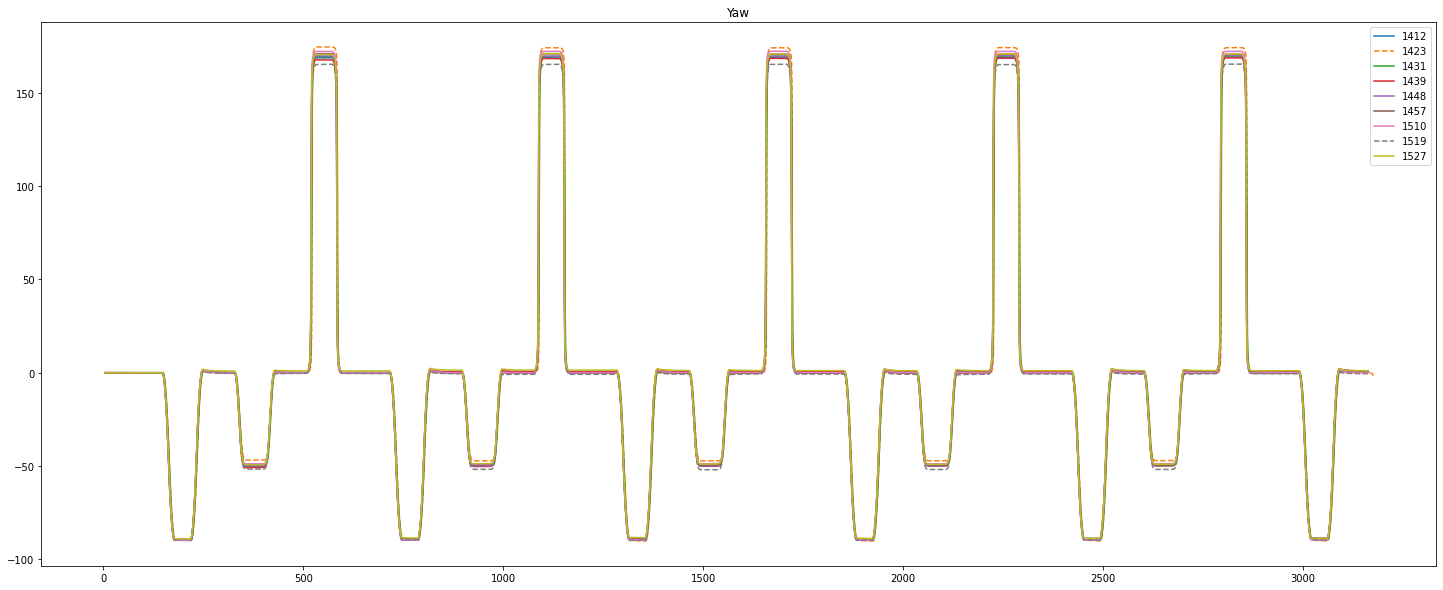

Roll90度角旋轉數據


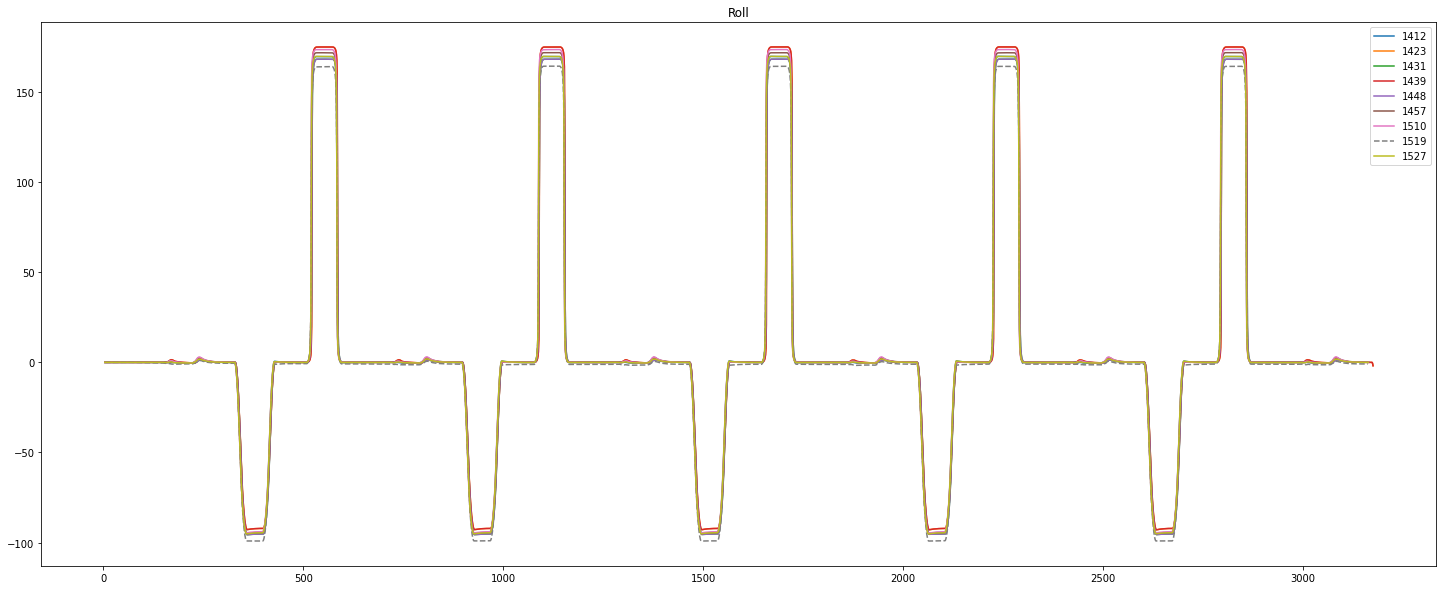

Pitch90度角旋轉數據


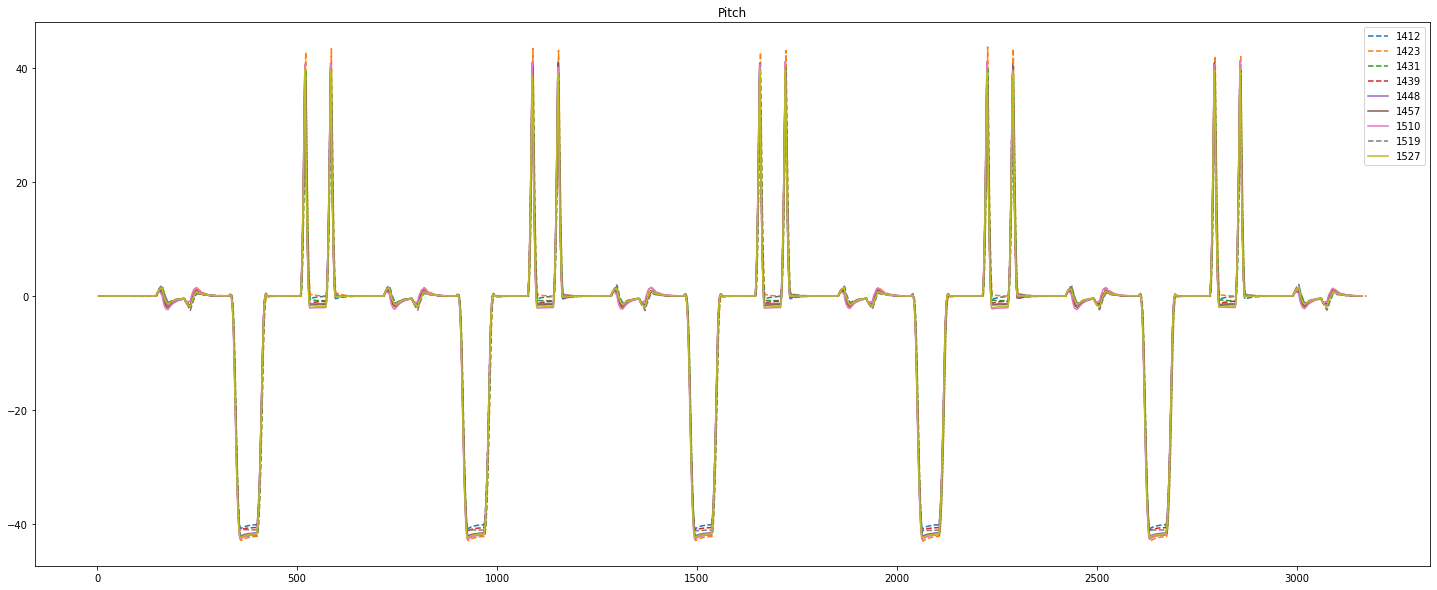

In [ ]:
#動態角度變化(校正後)
from matplotlib import pyplot as plt
print('Yaw90度角旋轉數據')
mylabels = ['1412','1423','1431','1439','1448','1457','1510','1519','1527']
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Yaw,label = 1412)
plt.plot(calibration_dynamic_data1423Yaw,label = 1423,linestyle = 'dashed') #marker = '*')
plt.plot(calibration_dynamic_data1431Yaw,label = 1431)
plt.plot(calibration_dynamic_data1439Yaw,label = 1439)
plt.plot(calibration_dynamic_data1448Yaw,label = 1448)
plt.plot(calibration_dynamic_data1457Yaw,label = 1457)
plt.plot(calibration_dynamic_data1510Yaw,label = 1510)
plt.plot(calibration_dynamic_data1519Yaw,label = 1519,linestyle = 'dashed') #marker = '*')
plt.plot(calibration_dynamic_data1527Yaw,label = 1527)
plt.legend()
plt.title('Yaw')

plt.show()

print('Roll90度角旋轉數據')
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Roll,label = '1412')
plt.plot(calibration_dynamic_data1423Roll,label = '1423')
plt.plot(calibration_dynamic_data1431Roll,label = '1431')
plt.plot(calibration_dynamic_data1423Roll,label = '1439')
plt.plot(calibration_dynamic_data1431Roll,label = '1448')
plt.plot(calibration_dynamic_data1457Roll,label = '1457')
plt.plot(calibration_dynamic_data1510Roll,label = '1510')
plt.plot(calibration_dynamic_data1519Roll,label = '1519',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1527Roll,label = '1527')
plt.legend()
plt.title('Roll')
plt.show()

print('Pitch90度角旋轉數據')
plt.figure(figsize=(25, 10))
plt.plot(calibration_dynamic_data1412Pitch,label = '1412',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1423Pitch,label = '1423',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1431Pitch,label = '1431',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1439Pitch,label = '1439',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1448Pitch,label = '1448')
plt.plot(calibration_dynamic_data1457Pitch,label = '1457')
plt.plot(calibration_dynamic_data1510Pitch,label = '1510')
plt.plot(calibration_dynamic_data1519Pitch,label = '1519',linestyle = 'dashed')
plt.plot(calibration_dynamic_data1527Pitch,label = '1527')
plt.legend()
plt.title('Pitch')
plt.show()

## 小結:1412(*1)/1423(*2)/1431(*1)/1439(*1)/1519(*3),以上5顆較為不同

# 結論:1423/1439/1510/1519作為本次QA替換掉的選擇

1423在三次測驗皆出現互補角度現象的偏離性，時序偏移倒是比較不明顯。

1439在三次測驗中具有單方向的偏離性與時序偏移,幾乎可以說它是最偏離的。

1431雖在1次與3次測驗皆出現較為偏離現象，但第一次屬於互補角度的偏離性，故保留它。(若能汰換5顆,它會被列為汰換名單中)

1510在一次與二次測驗中具有互補角度的偏離與時序偏移。

1519僅在第三次測驗時出現了偏移的現象，但此感測器是被多人反應過偏移情況能明顯感受到，故優先列為汰換對象。

其餘4顆基本上波形相似度都很不錯。

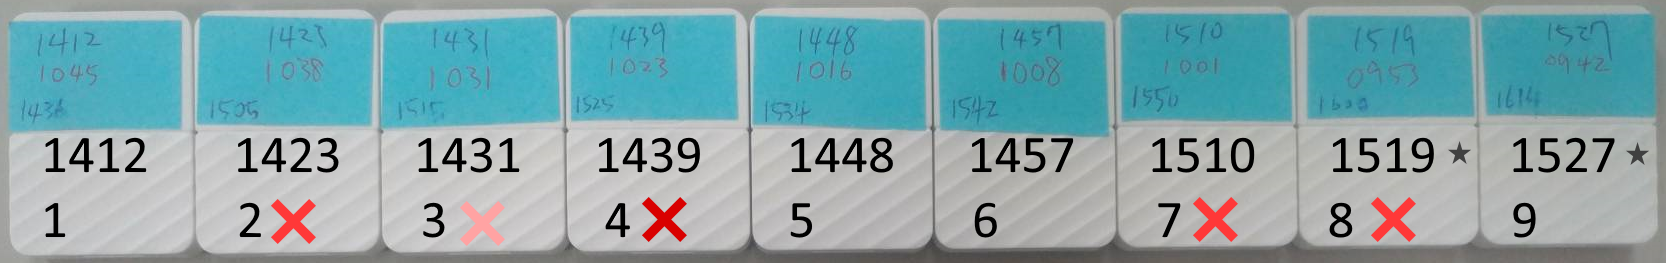